In [1137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score, mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')

In [1138]:
data= pd.read_csv("https://github.com/dsrscientist/DSData/raw/master/happiness_score_dataset.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [1139]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [1140]:
data.shape

(158, 12)

In [1141]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [1142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [1143]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [1144]:
data["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [1145]:
data["Happiness Score"].nunique()

157

In [1146]:
data.shape[0]

158

In [1147]:
# no white space in label
data.loc[data['Happiness Score']==" "]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [1148]:
data.duplicated().sum()

0

In [1149]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [1150]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [1151]:
data.shape

(158, 12)

In [1152]:
x=data.drop(columns=["Happiness Score"])
y=data["Happiness Score"]

<AxesSubplot: xlabel='Country', ylabel='Happiness Score'>

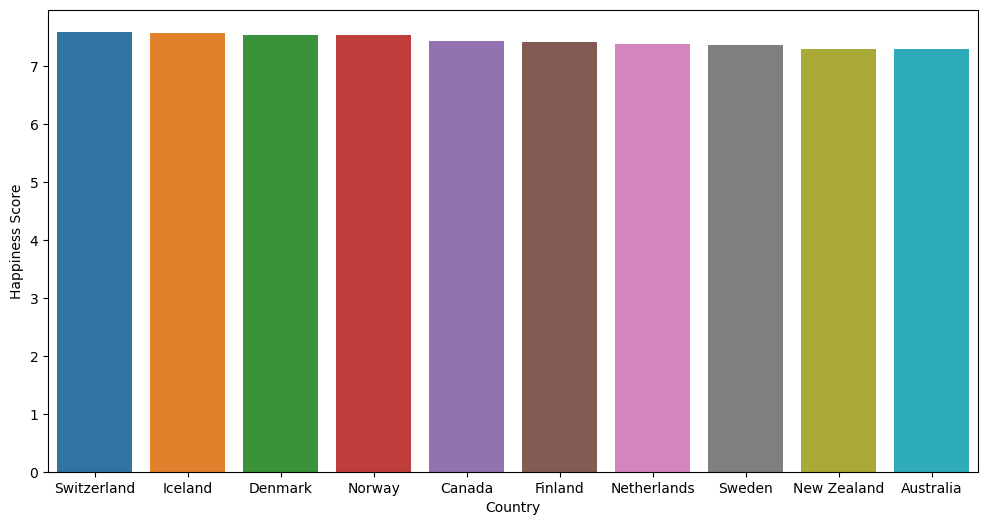

In [1153]:
# Top 10 countries based on happiness scores
plt.figure(figsize=(12,6))
sns.barplot(x = data['Country'].head(10), y = 'Happiness Score', data = data)

<AxesSubplot: xlabel='Country', ylabel='Happiness Score'>

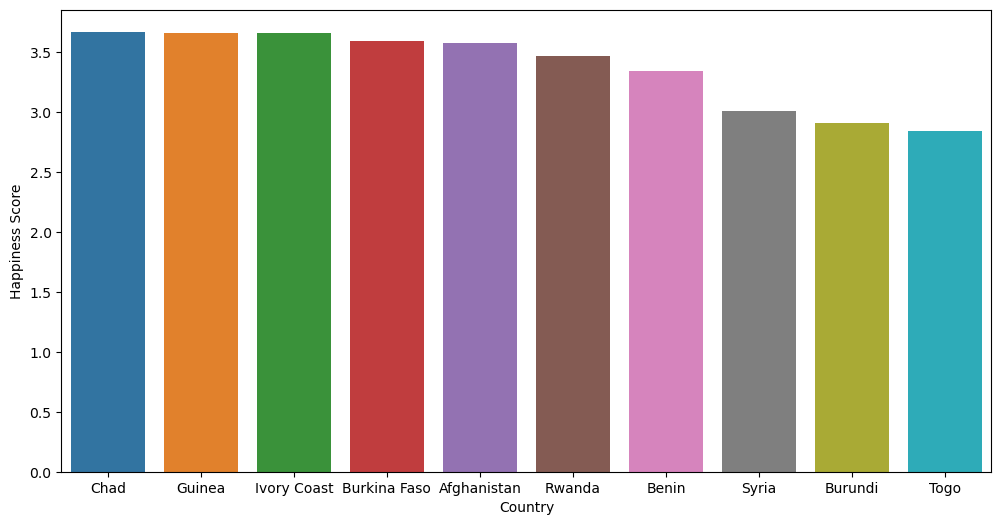

In [1154]:
# Bottom 10 countries based on happiness scores
plt.figure(figsize = (12,6))
sns.barplot(x = data['Country'].tail(10), y = 'Happiness Score', data = data)

In [1155]:
# Region to which most of the happy countries belong (Creating a Pivot)
data.head(20).groupby('Region').agg({'Country': 'count'}).sort_values(by ='Country')

,Country
Region,
Australia and New Zealand,2
Middle East and Northern Africa,2
North America,2
Latin America and Caribbean,3
Western Europe,11


<AxesSubplot: xlabel='Region'>

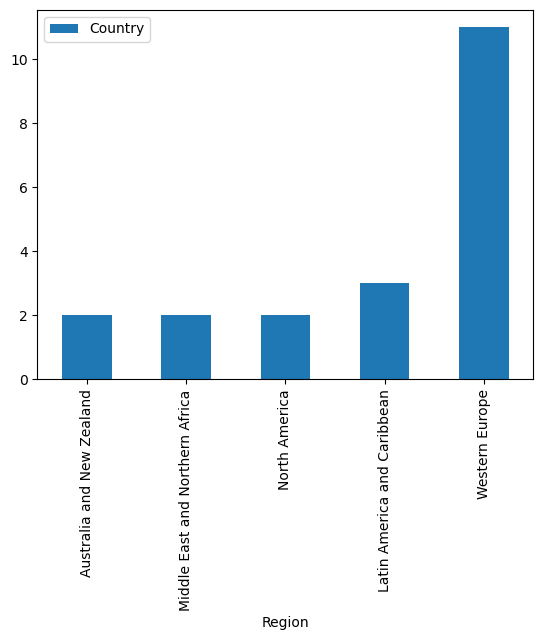

In [1156]:
# Visualizing the top 20 happy countries
data.head(20).groupby('Region').agg({'Country': 'count'}).sort_values(by ='Country').plot(kind = 'bar')

In [1157]:
# Similarly creating pivot of the 20 least happy countries
data.tail(20).groupby('Region').agg({'Country':'count'}).sort_values(by = 'Country')

,Country
Region,
Middle East and Northern Africa,1
Southeastern Asia,1
Southern Asia,1
Sub-Saharan Africa,17


<AxesSubplot: xlabel='Region'>

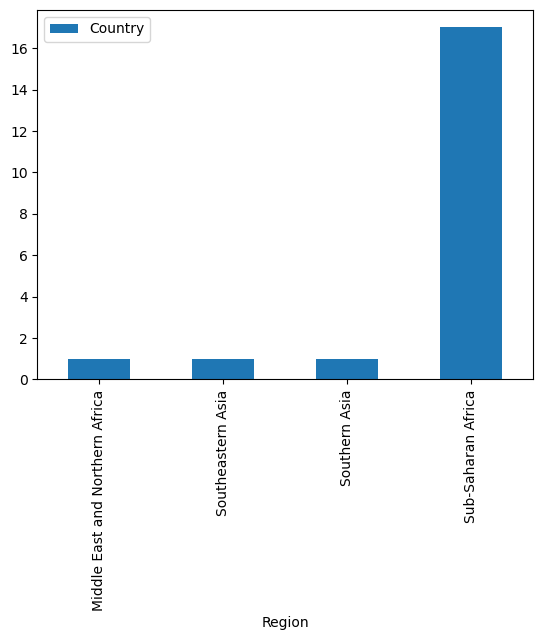

In [1158]:
# Visualizing the 20 least happy countries
data.tail(20).groupby('Region').agg({'Country':'count'}).sort_values(by = 'Country').plot(kind = 'bar')

In [1159]:
# Checking for the columns in the dataset
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [1160]:
cols=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual','Standard Error']

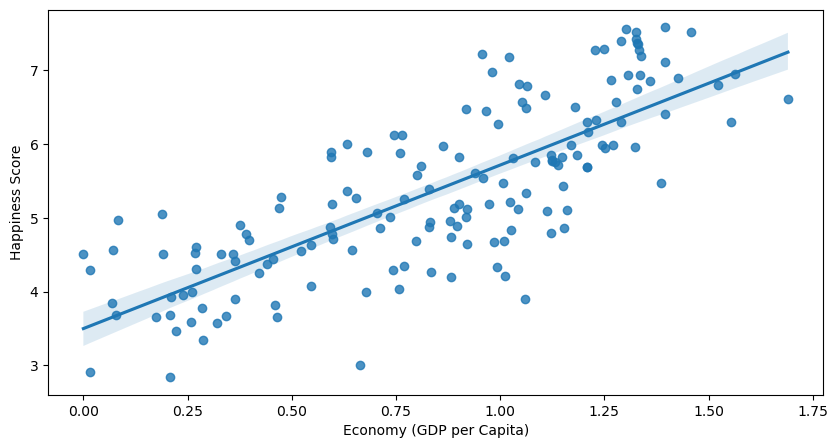

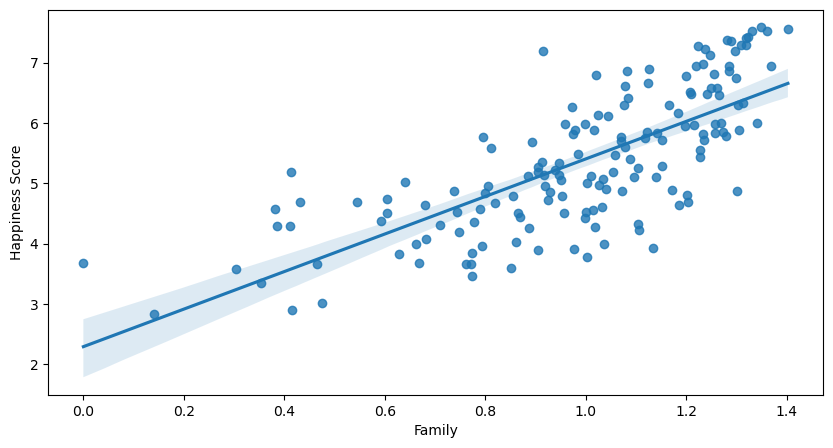

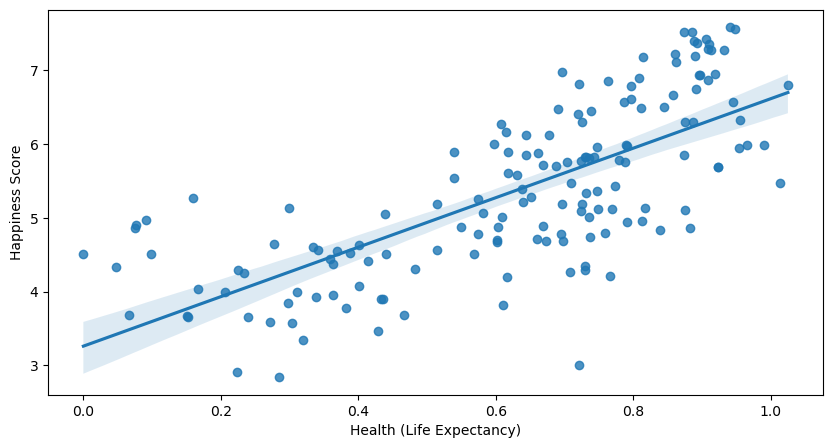

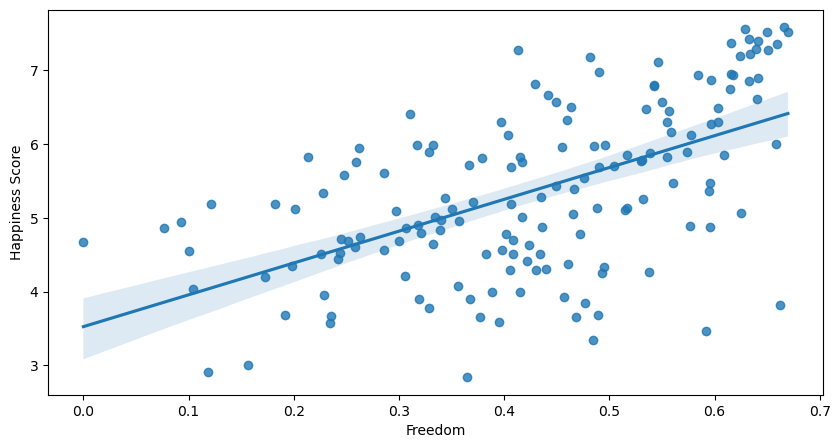

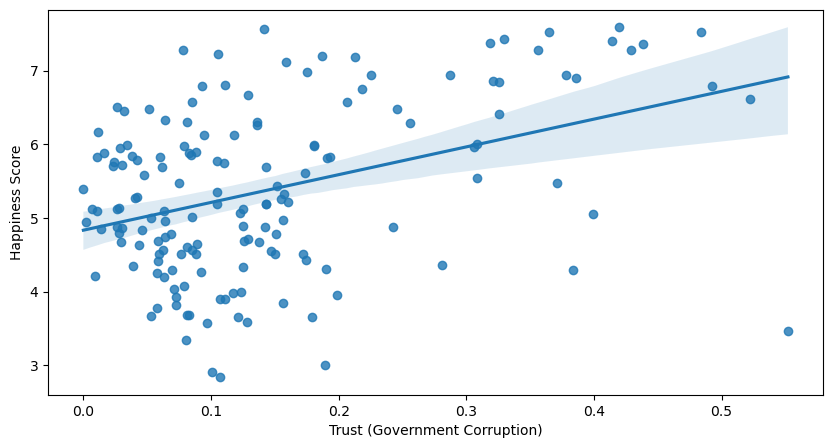

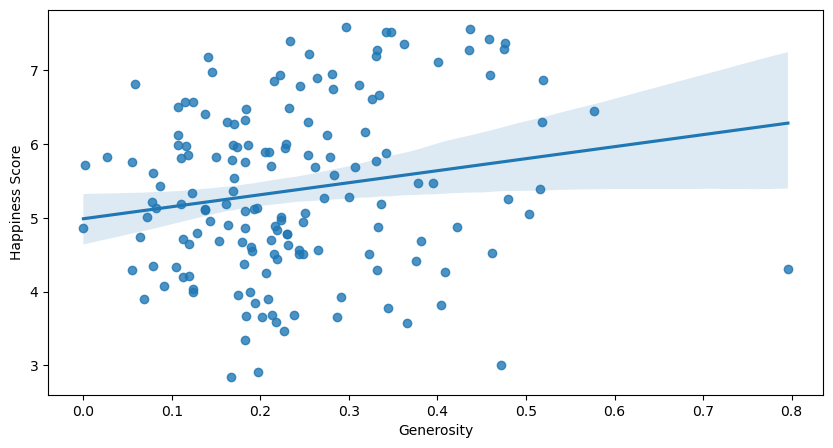

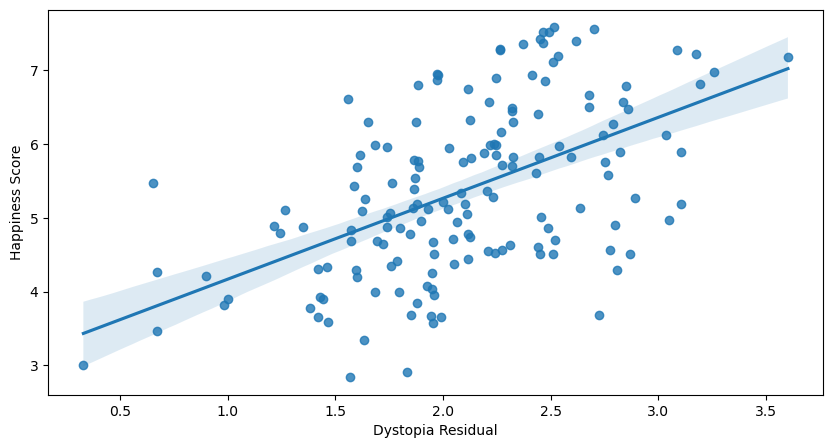

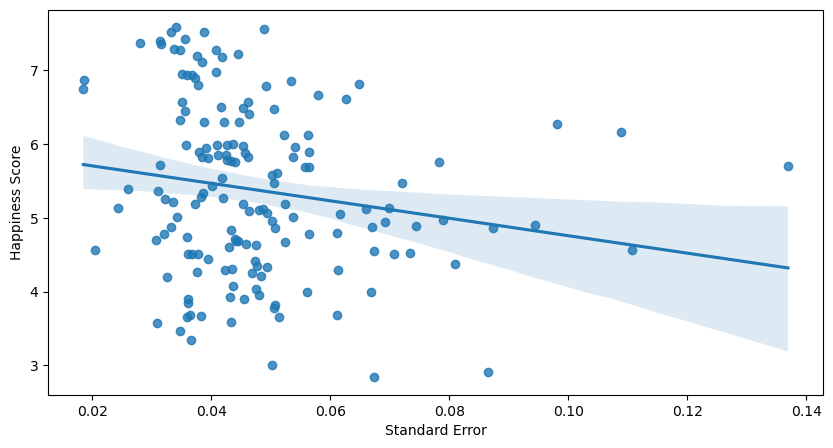

In [1161]:
# Creating a loop to visualize a trend comparision with 'Happiness score' of the other features in the dataset
for a in cols:
    plt.figure(figsize=(10,5))
    sns.regplot(x=a,y='Happiness Score',data=data)

In [1162]:
cols=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [1163]:

# we see a linearity of Economy (GDP/capita), Family & Health (Life expectancy) with that of the 'Happiness score'.

In [1164]:
# Correlation beetween the features
corr = x.corr()
corr

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [1165]:
corr.dtypes

Happiness Rank                   float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

<AxesSubplot: >

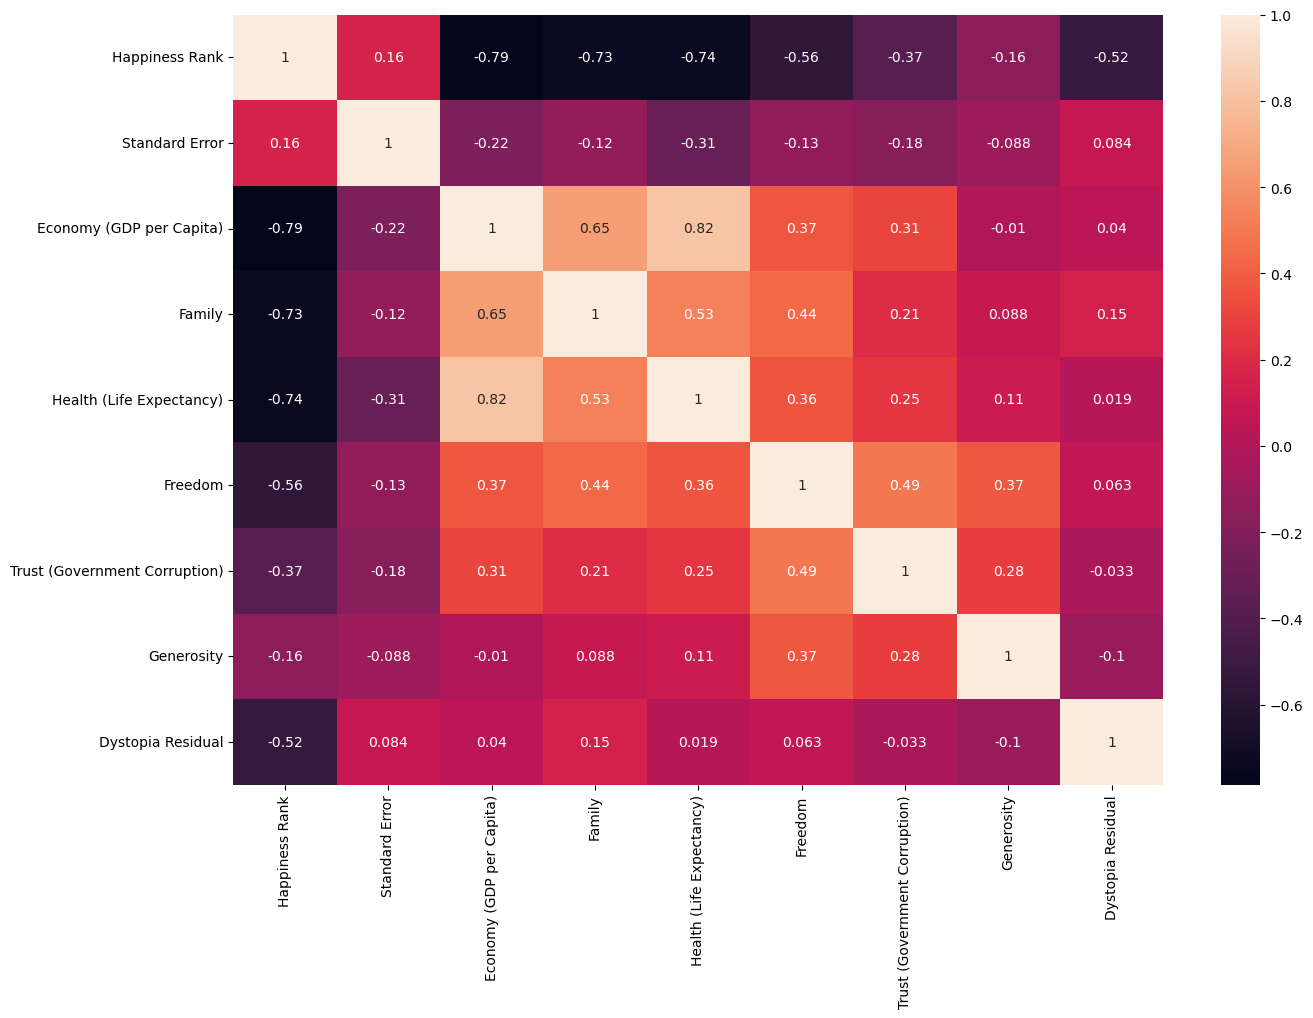

In [1166]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)

In [1167]:
# Vif=pd.DataFrame()
# Vif['Vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
# Vif['features']=x.columns
# Vif

In [1168]:
x=data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
y=data["Happiness Score"]

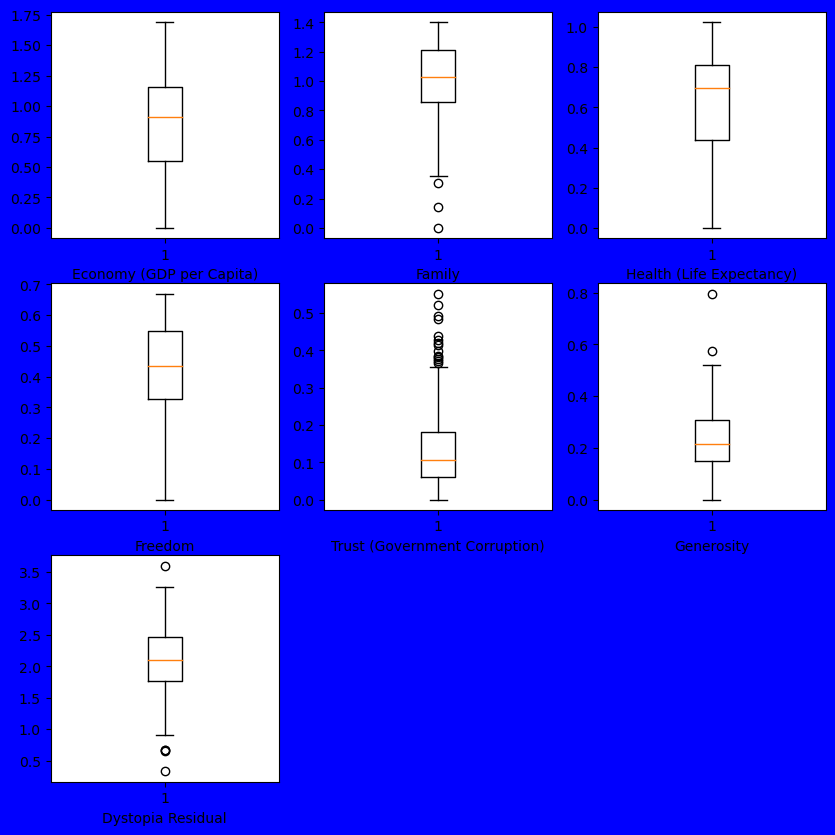

In [1169]:
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for i in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.boxplot(x[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [1170]:
x= data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
      'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
y=data["Happiness Score"]

In [1171]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [1172]:
y.shape

(158,)

In [1173]:
# q1=x.quantile(.25)
# q1

In [1174]:
# q3=x.quantile(.75)
# q3

In [1175]:
# iqr=q3-q1
# iqr

In [1176]:
# fam_low=(q1.Family-(1.5*iqr.Family))
# fam_low

In [1177]:
# indices=np.where(x["Family"]<fam_low)
# indices

In [1178]:
# df=x.drop(x.index[indices])
# df.reset_index()

In [1179]:
# gen_high=(q3.Generosity+(1.5*iqr.Generosity))
# gen_high

In [1180]:
# indices=np.where(df["Generosity"]>gen_high)
# indices

In [1181]:
# df=df.drop(df.index[indices])
# df.reset_index()

In [1182]:
# trust_high=(q3["Trust (Government Corruption)"]+(1.5*iqr["Trust (Government Corruption)"]))
# trust_high

In [1183]:
# indices=np.where(df["Trust (Government Corruption)"]>trust_high)
# indices

In [1184]:
# df=df.drop(df.index[indices])
# df.reset_index()

In [1185]:
# Dyst_high=(q3["Dystopia Residual"]+(1.5*iqr["Dystopia Residual"]))
# Dyst_high

In [1186]:
# indices=np.where(df["Dystopia Residual"]>Dyst_high)
# indices

In [1187]:
# df=df.drop(df.index[indices])
# df.reset_index()

In [1188]:
# Dyst_low=(q1["Dystopia Residual"]-(1.5*iqr["Dystopia Residual"]))
# Dyst_low

In [1189]:
# indices=np.where(df["Dystopia Residual"]<Dyst_low)
# indices

In [1190]:
# df=df.drop(df.index[indices])
# df.reset_index()

In [1191]:
# df

In [1192]:
# plt.figure(figsize=(10,10),facecolor="blue")
# plotnumber=1
# for i in df:
#     if plotnumber <=9:
#         ax=plt.subplot(3,3,plotnumber)
#         plt.boxplot(df[i])
#         plt.xlabel(i)
#     plotnumber+=1
# plt.show()

In [1193]:
# # detecting outliers
# from scipy.stats import zscore
# z=np.abs(zscore(x))


In [1194]:
# z

In [1195]:
# threshold=3
# print(np.where(z>3))

In [1196]:
# df=z[(z<3).all(axis=1)]
# df.shape

In [1197]:
# df

In [1198]:
# from scipy.stats import zscore
# z=np.abs(zscore(df['Generosity']))

In [1199]:
# threshold=3
# print(np.where(z>3))

In [1200]:
# df['Dystopia Residual']=z[(z<3)]
# df['Dystopia Residual'].shape

In [1201]:
# plt.figure(figsize=(10,8),facecolor="blue")
# plotnumber=1
# for i in df:
#     if plotnumber <=9:
#         ax=plt.subplot(3,3,plotnumber)
#         plt.boxplot(df[i])
#         plt.xlabel(i)
#     plotnumber+=1
# plt.show()

In [1202]:
# loss= (158-152)/158*100
# print(loss)

In [1203]:
# y=y[(z<3).all(axis=1)]
# y.shape

In [1204]:
# df.skew()

In [1205]:
# from sklearn.preprocessing import PowerTransformer

In [1206]:
# transform = PowerTransformer(method="yeo-johnson")

In [1207]:
# skewed= transform.fit_transform(df)
# skewed

In [1208]:
# skew=np.log(df1)
# skew

In [1209]:
# scaler=StandardScaler()
# x_scaled=scaler.fit_transform(df)
# x_scaled

In [1210]:
# scaler=MinMaxScaler()
# x_scale = scaler.fit_transform(skewed)


# i raised a ticket for this if i remove outliers,skewness and Use VIF also so my score getting low and if i don't use that score is high but 

In [1211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)


In [1212]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [1213]:
pred=lr.predict(x_test)
pred

array([4.30694844, 5.98708728, 4.19426307, 2.9045469 , 5.05724058,
       6.57405102, 4.89752224, 4.8760158 , 4.94870906, 3.93078267,
       6.90137207, 5.82828283, 6.98257355, 5.54816373, 6.78623204,
       6.50507421, 4.50716902, 4.6855703 , 4.97108759, 5.69531067,
       3.6550664 , 6.93736459, 7.19982933, 7.28401803, 6.48513055,
       5.19230122, 5.88897136, 3.95562627, 4.36917113, 3.68085055,
       3.78078022, 5.33248649, 3.99478023, 5.83264011, 4.34998539,
       5.12886691, 3.34003595, 6.12277405, 5.6046317 , 4.55053199])

In [1214]:
print(r2_score(y_test,pred))

0.9999999450004374


In [1215]:
lr.score(x_train,y_train)

0.9999999396791012

In [1216]:
#use of metrix to know the error of prediction

In [1217]:
print("MsE",mean_squared_error(y_test,pred))

MsE 7.31976680526452e-08


In [1218]:
print("MAE",mean_absolute_error(y_test,pred))

MAE 0.0002266751853718163


In [1219]:
 # Regularization with grid search CV

In [1220]:
# alphas=np.array([0.1,0.01,0.001,0.0001,1,0])

In [1260]:
#create and fit a ridge regression model testing each alpha
parameters={'alpha':[0.1,0.01,0.001,0.0001,1,0],'random_state':list(range(0,10))}
model=Ridge()
grid=GridSearchCV(model,parameters)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [1222]:
#final model training with lasso and Ridge to know how well is the model 

In [1223]:
model=Ridge(alpha= 0.0001, random_state=0)
model.fit(x,y)

Ridge(alpha=0.0001, random_state=0)

In [1234]:
prediction_Rid=model.predict(x_test)
prediction_Rid

array([4.30696988, 5.98705239, 4.19428616, 2.90459561, 5.05722547,
       6.57405273, 4.89756395, 4.87599741, 4.94875179, 3.93080896,
       6.90130966, 5.82826874, 6.9825668 , 5.54813616, 6.7862298 ,
       6.50507822, 4.50721195, 4.68558957, 4.97112925, 5.69528967,
       3.65507367, 6.93732936, 7.19980216, 7.28396433, 6.48509576,
       5.19229449, 5.88900853, 3.95564652, 4.36915747, 3.68088753,
       3.78081752, 5.33248999, 3.99480652, 5.8326671 , 4.35000657,
       5.12888415, 3.34004905, 6.12277721, 5.60463547, 4.55057173])

In [1235]:
score_rid=model.score(x,y)
score_rid

0.9999999419714076

In [1252]:
mod=Lasso()
parameter={'alpha':[0.1,0.01,0.001,0.0001,1,0],'random_state':list(range(0,10))}
grid=GridSearchCV(mod,parameter)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0, 'random_state': 0}


In [1256]:
mod=Lasso(alpha= 0, random_state=0)
mod.fit(x,y)

Lasso(alpha=0.0001, random_state=0)

In [1257]:
prediction_lasso=mod.predict(x_test)
prediction_lasso

array([4.30438553, 5.98721705, 4.195801  , 2.90535405, 5.05422591,
       6.57436122, 4.89814058, 4.8747684 , 4.94935473, 3.93091584,
       6.90000066, 5.82704669, 6.98213436, 5.54773521, 6.78593533,
       6.50588307, 4.50801687, 4.68605345, 4.97078534, 5.69522584,
       3.65588259, 6.93661537, 7.19881956, 7.2816081 , 6.48416761,
       5.19283792, 5.88913057, 3.95561859, 4.36891273, 3.68126055,
       3.78094905, 5.33308169, 3.99531247, 5.83422969, 4.35135011,
       5.12912107, 3.34114194, 6.12237301, 5.60512799, 4.55089248])

In [1258]:
score_lasso=model.score(x,y)
score_lasso


0.9999999419714076

In [1259]:
print(grid.best_params_)

{'alpha': 0, 'random_state': 0}


In [1072]:
cross_val= cross_val_score(lr,x,y,cv=5)
print(cross_val)
print(cross_val.mean())
print(cross_val.std())

[0.99999946 0.99999835 0.99999837 0.99999536 0.99999943]
0.9999981947416543
1.4976213959815332e-06


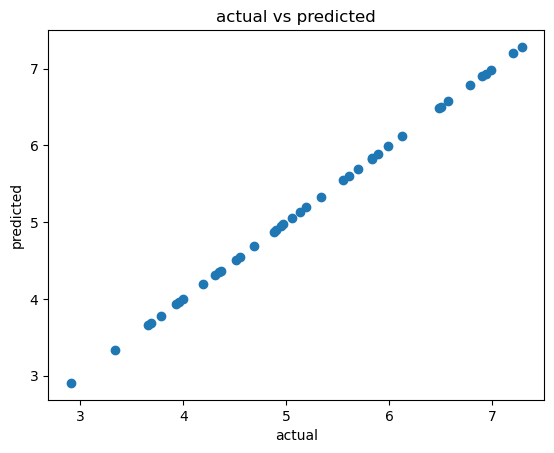

In [1073]:
#prediction through graph
plt.scatter(y_test,pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
plt.show()

In [1262]:
df=pd.DataFrame(pred)
df.to_csv("world_happiness_project.csv")

In [1263]:
#for saving the file
import joblib
joblib.dump(lr,"world_happiness_report.obj")


['world_happiness_report.obj']

In [1264]:
lr_joblib=joblib.load("world_happiness_report.obj")


In [1266]:
# lr_joblib.predict(x_test)

In [ ]:
'''Importing data, cleaning, handling missing values, skewness, outliers, standardization (all if needed)
Step 2. Building model, checking accuracy, find best model, cross validation and gridsearch cv and saving the model.

TRAIN part:
For TRAIN part you should be completing both step 1 and step 2.
do everything and save your model.

TEST part:
For test part you need to perform all the activities you have done with TRAIN data in step 1 only.

Now load your saved model again and use the TEST data for predicting the values.
Once prediction is done, no need to do anything further.
Save the prediciton file and you are done.'''

In [ ]:
'''Model performance depends not only on outliers, 
skewness and multicollinearity. First confirm whether skew is removed and
then do more work on preprocessing part. Apply feature selection, scaling techniques, etc.
Also create more models and then select the best performing model from all the models.'''            